In [36]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import optuna
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc

In [2]:
np.random.seed(0)

In [6]:
raw_data= pd.read_csv('C:/Users/sanja/OneDrive/Documents/Python/study/Breast_Cancer_project/Breast-Cancer-Prediction/wisconsin database/data.csv')

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Here is a more detailed description of all the features in the Wisconsin Breast Cancer Database (WBCD):

Radius

radius_mean: Mean radius of cell nuclei
radius_se: Standard error of radius
radius_mean: Malignant tumors tend to have larger radius_mean values than benign tumors.
radius_se: Malignant tumors tend to have higher radius_se values than benign tumors.

The radius of a cell nucleus is a measure of its size. The mean radius is the average radius of all the cell nuclei in a breast mass. The standard error of radius is a measure of the variation in the radius values.

Texture

texture_mean: Mean texture of cell nuclei
texture_se: Standard error of texture
texture_mean: Malignant tumors tend to have higher texture_mean values than benign tumors.
texture_se: Malignant tumors tend to have higher texture_se values than benign tumors.

Texture is a measure of the variation in the gray-scale values of a cell nucleus. The mean texture is the average texture of all the cell nuclei in a breast mass. The standard error of texture is a measure of the variation in the texture values.

Perimeter

perimeter_mean: Mean perimeter of cell nuclei
perimeter_se: Standard error of perimeter
perimeter_mean: Malignant tumors tend to have larger perimeter_mean values than benign tumors.
perimeter_se: Malignant tumors tend to have higher perimeter_se values than benign tumors.

The perimeter of a cell nucleus is the length of its boundary. The mean perimeter is the average perimeter of all the cell nuclei in a breast mass. The standard error of perimeter is a measure of the variation in the perimeter values.

Area

area_mean: Mean area of cell nuclei
area_se: Standard error of area
area_mean: Malignant tumors tend to have larger area_mean values than benign tumors.
area_se: Malignant tumors tend to have higher area_se values than benign tumors.

The area of a cell nucleus is the two-dimensional space it occupies. The mean area is the average area of all the cell nuclei in a breast mass. The standard error of area is a measure of the variation in the area values.

Smoothness

smoothness_mean: Mean smoothness of cell nuclei
smoothness_se: Standard error of smoothness
smoothness_mean: Malignant tumors tend to have lower smoothness_mean values than benign tumors.
smoothness_se: Malignant tumors tend to have higher smoothness_se values than benign tumors.

Smoothness is a measure of the local variation in the radius lengths of a cell nucleus. The mean smoothness is the average smoothness of all the cell nuclei in a breast mass. The standard error of smoothness is a measure of the variation in the smoothness values.

Compactness

compactness_mean: Mean compactness of cell nuclei
compactness_se: Standard error of compactness
compactness_mean: Malignant tumors tend to have higher compactness_mean values than benign tumors.
compactness_se: Malignant tumors tend to have higher compactness_se values than benign tumors.

Compactness is a measure of how circular a cell nucleus is. The mean compactness is the average compactness of all the cell nuclei in a breast mass. The standard error of compactness is a measure of the variation in the compactness values.

Concavity

concavity_mean: Mean concavity of cell nuclei
concavity_se: Standard error of concavity
concavity_mean: Malignant tumors tend to have higher concavity_mean values than benign tumors.
concavity_se: Malignant tumors tend to have higher concavity_se values than benign tumors.

Concavity is a measure of the severity of concave portions of the contour of a cell nucleus. The mean concavity is the average concavity of all the cell nuclei in a breast mass. The standard error of concavity is a measure of the variation in the concavity values.

Concave points

concave points_mean: Mean concave points of cell nuclei
concave points_se: Standard error of concave points
concave points_mean: Malignant tumors tend to have higher concave points_mean values than benign tumors.
concave points_se: Malignant tumors tend to have higher concave points_se values than benign tumors.

Concave points is a measure of the number of concave portions of the contour of a cell nucleus. The mean concave points is the average concave points of all the cell nuclei in a breast mass. The standard error of concave points is a measure of the variation in the concave points values.

Symmetry

symmetry_mean: Mean symmetry of cell nuclei
symmetry_se: Standard error of symmetry
symmetry_mean: Malignant tumors tend to have lower symmetry_mean values than benign tumors.
symmetry_se: Malignant tumors tend to have higher symmetry_se values than benign tumors.

Symmetry is a measure of how symmetrical a cell nucleus is. The mean symmetry is the average symmetry of all the cell nuclei in a breast mass. The standard error of symmetry is a measure of the variation in the symmetry values.

Fractal dimension

fractal_dimension_mean: Mean fractal dimension of cell nuclei
fractal_dimension_se: Standard error of fractal dimension
fractal_dimension_mean: Malignant tumors tend to have higher fractal_dimension_mean values than benign tumors.
fractal_dimension_se: Malignant tumors tend to have higher fractal_dimension_se values than benign tumors.

Fractal dimension is a measure of the complexity of the shape of a cell nucleus. The mean fractal dimension is the average fractal dimension of all the cell nuclei in a breast mass. The standard error of fractal dimension is a measure of the variation in the fractal dimension values.

Worst: The worst features are the maximum values of the corresponding features. For example, the worst radius is the maximum radius of all the cell nuclei in a breast mass.

worst_radius: Worst radius of cell nuclei. 
worst_texture: Worst texture of cell nuclei
worst_perimeter: Worst perimeter of cell nuclei
worst_area: Worst area of cell nuclei
worst_smoothness: Worst smoothness of cell nuclei
worst_compactness: Worst compactness of cell nuclei
worst_concavity: Worst concavity of cell nuclei
worst_concave points: Worst concave points of cell nuclei
worst_symmetry: Worst symmetry of cell nuclei
worst_fractal_dimension: Worst fractal dimension of cell nuclei

worst_radius: Malignant tumors tend to have larger worst_radius values than benign tumors.
worst_texture: Malignant tumors tend to have higher worst_texture values than benign tumors.
worst_perimeter: Malignant tumors tend to have larger worst_perimeter values than benign tumors.
worst_area: Malignant tumors tend to have larger worst_area values than benign tumors.
worst_smoothness: Malignant tumors tend to have lower worst_smoothness values than benign tumors.
worst_compactness: Malignant tumors tend to have higher worst_compactness values than benign tumors.
worst_concavity: Malignant tumors tend to have higher worst_concavity values than benign tumors.
worst_concave points: Malignant tumors tend to have higher worst_concave points values than benign tumors.
worst_symmetry: Malignant tumors tend to have lower worst_symmetry values than benign tumors.
worst_fractal_dimension: Malignant tumors tend to have higher worst_fractal_dimension values than benign tumors.

In [8]:
raw_data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [9]:
# Target Variable:
raw_data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
data = raw_data.drop(['id'], axis=1)

In [11]:
# Checking for missing values
data.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [12]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
#data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [14]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the binary categorical column
data['diagnosis_encoder'] = label_encoder.fit_transform(data['diagnosis'])


In [15]:
dataEN=data.copy()

In [16]:
data['diagnosis_encoder'].value_counts()

diagnosis_encoder
0    357
1    212
Name: count, dtype: int64

In [17]:
data=data.drop('diagnosis', axis=1)
data=data.drop('Unnamed: 32', axis=1)

In [ ]:
#Check the data distribution

# Get a list of all column names
column_names = data.columns

# Create a box plot for each column one after another
for column_name in column_names:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.boxplot(data[column_name], vert=False)  # 'vert=False' for horizontal box plots
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

# There is a general pattern of outliers in each feature. In the absence of domain knowledge, we have three ways of handling them: 1. replace them with average of outliers, 2. remove them 3. Do nothing

Let us see how is the distribution of the outliers 

In [19]:
features_mean=list(data.columns[0:30])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis_encoder'] ==1]
dfB=data[data['diagnosis_encoder'] ==0]
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(30,80))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist(dfM[features_mean[idx]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth), alpha=0.7, label='M', color='r', edgecolor='black')
    ax.hist(dfB[features_mean[idx]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, label='B', color='g', edgecolor='black')
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx], fontsize=35)

    # Increase the font size of values on the axes
    ax.tick_params(axis='both', which='major', labelsize=25)
    
plt.tight_layout()
plt.show()

It is clearly visible that most outliers have a malignant diagnosis associated with them. It would cause loss of vital data if we remove the outliers or replace them with an average, hence we are going to leave the outliers as is for our analysis.

Feature Selection

We are going to do feature selection based on:
1. Correlation with the outcome variable
2. Recurssive feature elimination with Cross Validation

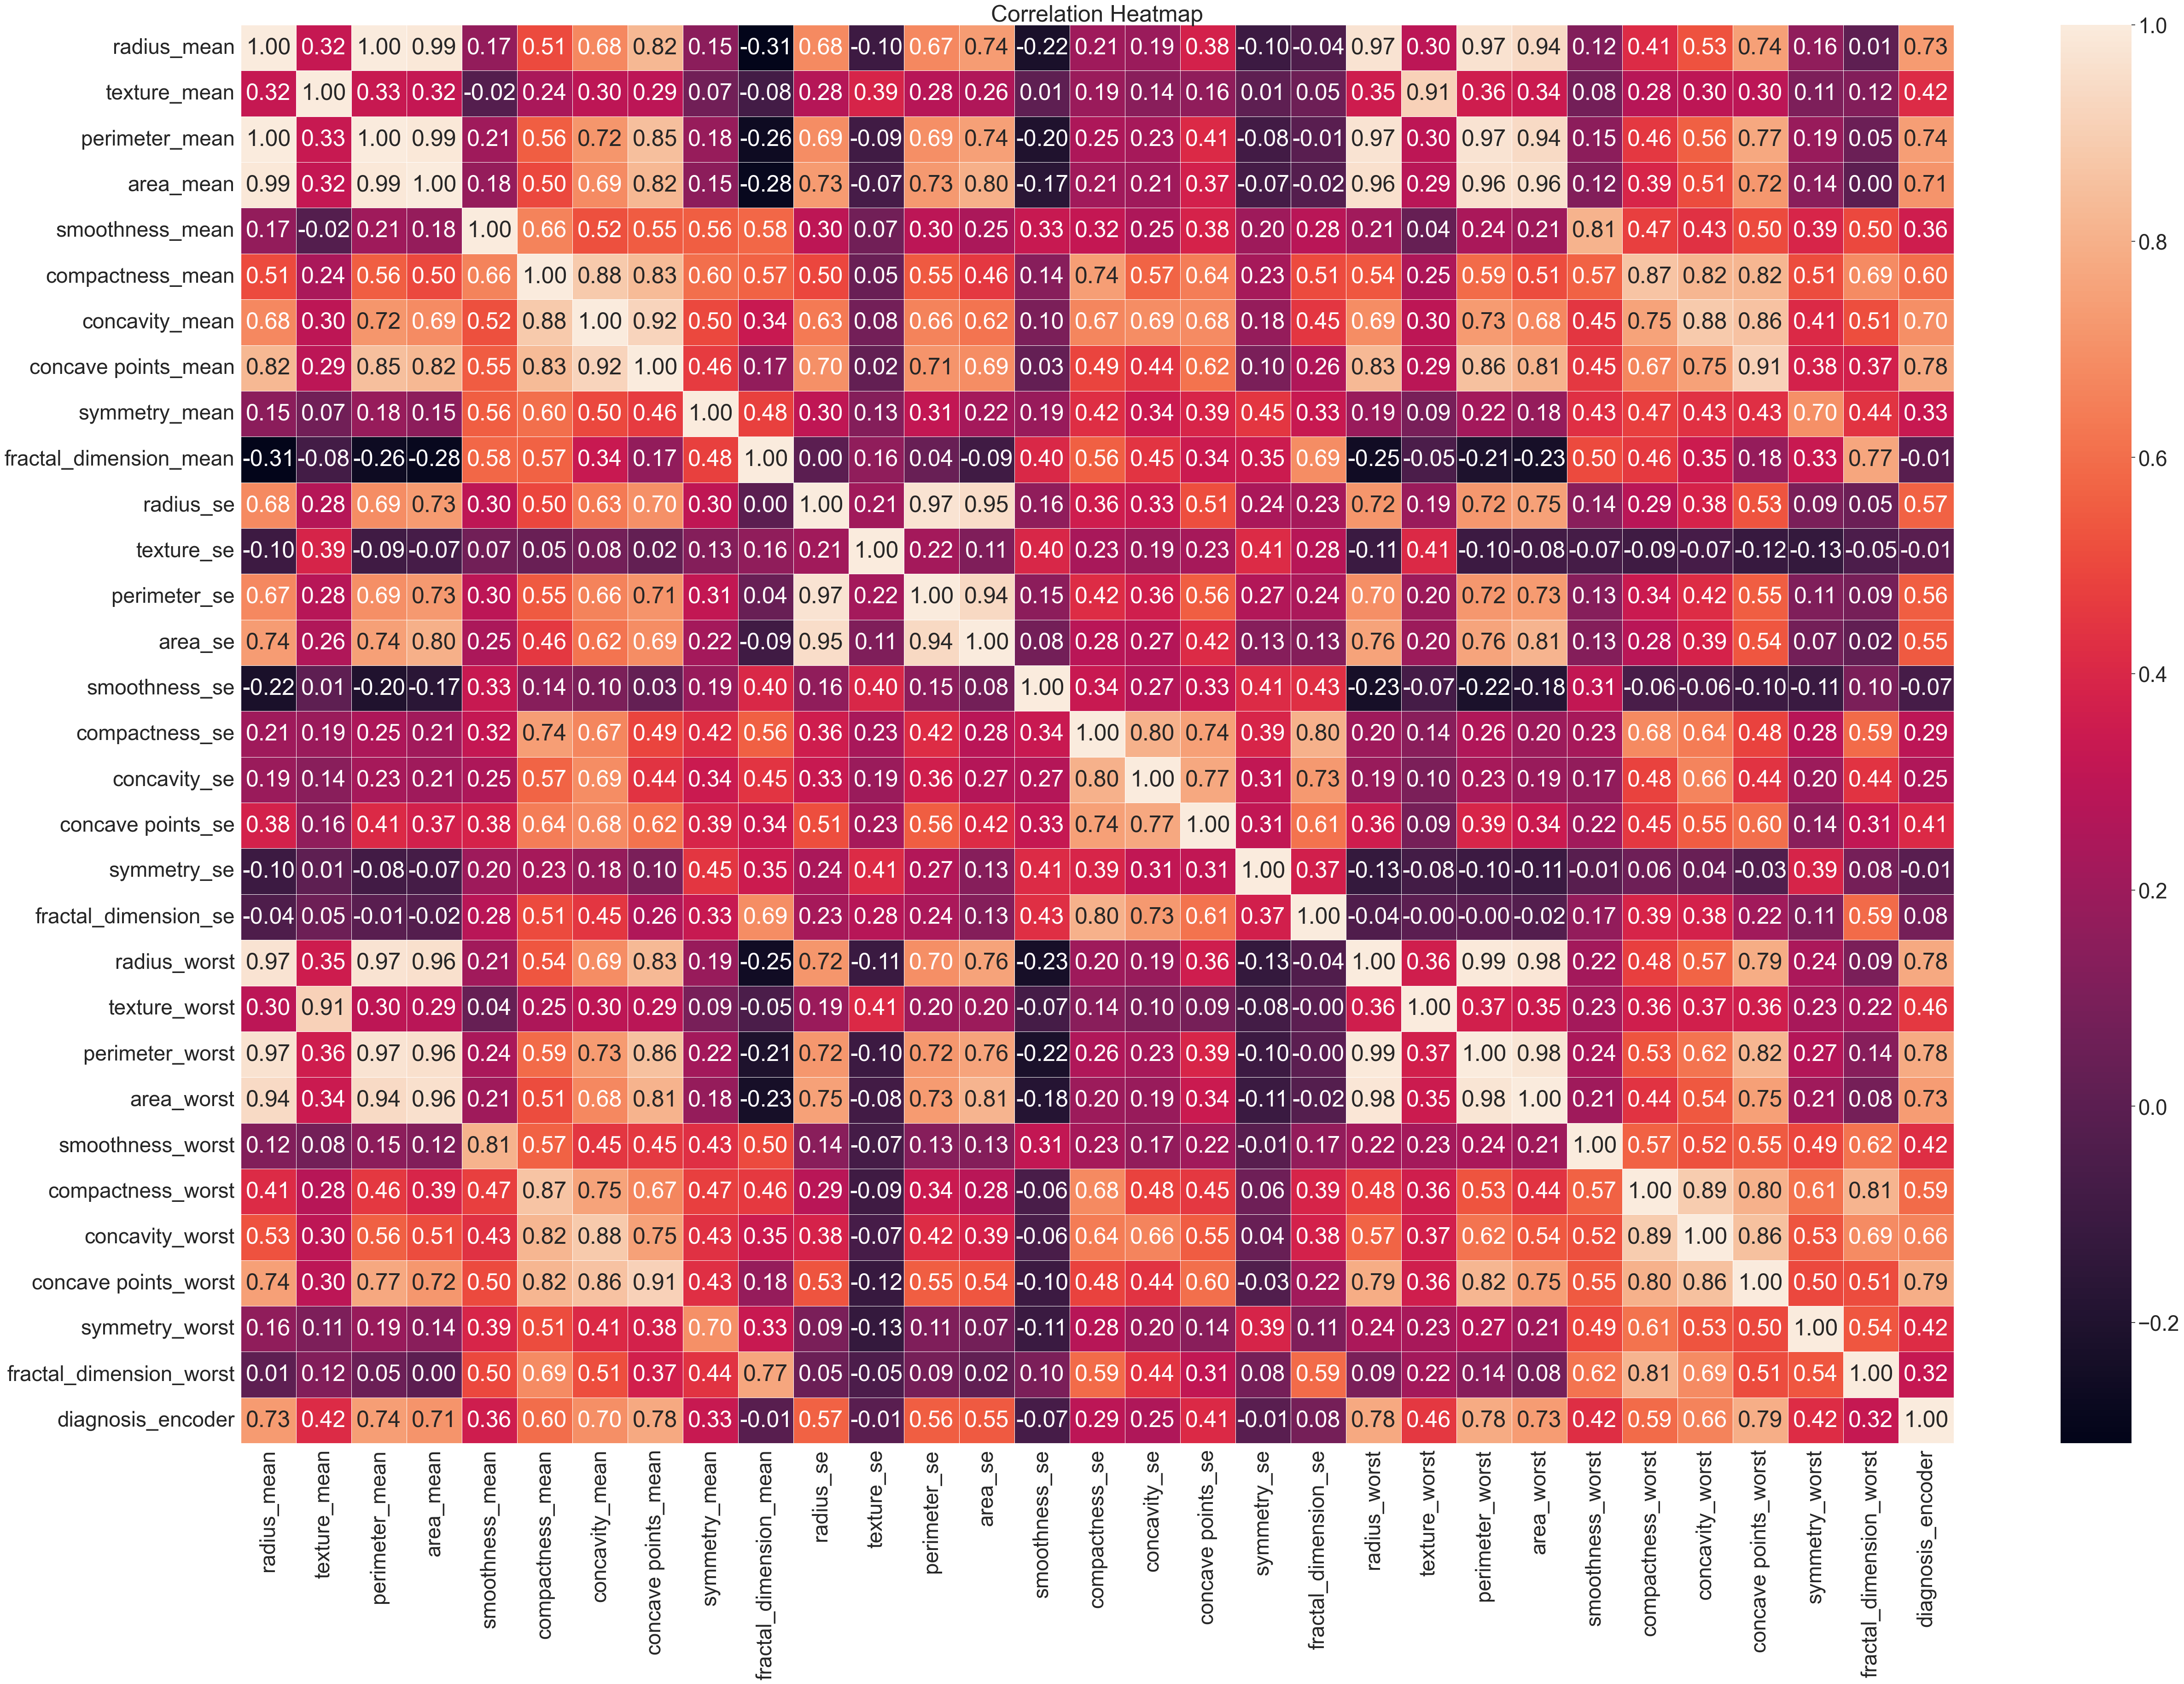

In [20]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Increase the size of the feature titles
plt.figure(figsize=(60, 40))
sns.set(font_scale=3)  # Adjust the font scale

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

As we can see there are a few features that have no correlation with the diagnosis, namely:
1. Fractal Dimension Mean
2. Texture_SE
3. Smoothness_SE
4. Symmetry_SE
5. Fractal Dimension_SE

But to be sure we will be doing feature selection using backwark elimination with decision trees to get a set of featuers that will be most useful in predicting if a tumor is melignant.

In [21]:
#columns_to_drop = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']
#data=data.drop(columns_to_drop, axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [23]:
# Separate independent features (X) and the outcome variable (y)
X = data.drop('diagnosis_encoder', axis=1)
y = data['diagnosis_encoder']

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Display the shapes of the resulting sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (455, 30) (455,)
Test set shapes: (114, 30) (114,)


In [25]:
#Testing a random forest classifier before feature selection
# Create a bootstrapped training set
n_bootstraps = 100
bootstrapped_training_sets = []
for i in range(n_bootstraps):
    bootstrapped_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    bootstrapped_X_train = X_train.iloc[bootstrapped_indices]
    bootstrapped_y_train = y_train.iloc[bootstrapped_indices]
    bootstrapped_training_sets.append((bootstrapped_X_train, bootstrapped_y_train))

# Train a random forest classifier on the bootstrapped training sets
random_forest_classifier = RandomForestClassifier(n_estimators=n_bootstraps)
for bootstrapped_X_train, bootstrapped_y_train in bootstrapped_training_sets:
    random_forest_classifier.fit(bootstrapped_X_train, bootstrapped_y_train)

# Evaluate the model on the test set
y_pred = random_forest_classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", F1)

Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882352


In [26]:
#Feature selection using Reverse Feature Elimination with cross validation

# Initialize a decision tree regressor
estimator = DecisionTreeRegressor(random_state=42)

# Initialize RFE with cross-validation
selector = RFECV(estimator, step=1, cv=5)

# Fit RFE on the training data
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]
dropped_features = X_train.columns[~selector.support_]

# Print the selected features
print("Selected Features:", selected_features)
print("Dropped Features:", dropped_features)

#rewrite the test and train set
# Drop the features from the training set
X_train_d = X_train.drop(dropped_features, axis=1)

# Drop the same features from the test set
X_test_d = X_test.drop(dropped_features, axis=1)


Selected Features: Index(['concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')
Dropped Features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concavity_se',
       'symmetry_se', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [27]:

#len(X_train_d.columns)

In [28]:
X_train_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 68 to 102
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   concave points_mean     455 non-null    float64
 1   symmetry_mean           455 non-null    float64
 2   fractal_dimension_mean  455 non-null    float64
 3   radius_se               455 non-null    float64
 4   texture_se              455 non-null    float64
 5   perimeter_se            455 non-null    float64
 6   area_se                 455 non-null    float64
 7   smoothness_se           455 non-null    float64
 8   compactness_se          455 non-null    float64
 9   concave points_se       455 non-null    float64
 10  fractal_dimension_se    455 non-null    float64
 11  radius_worst            455 non-null    float64
 12  texture_worst           455 non-null    float64
 13  perimeter_worst         455 non-null    float64
 14  area_worst              455 non-null    float6

In [29]:
#Random Forest classfier with reduced number of features
# Create a bootstrapped training set
n_bootstraps = 100
bootstrapped_training_sets = []
for i in range(n_bootstraps):
    bootstrapped_indices = np.random.choice(len(X_train_d), len(X_train_d), replace=True)
    bootstrapped_X_train = X_train_d.iloc[bootstrapped_indices]
    bootstrapped_y_train = y_train.iloc[bootstrapped_indices]
    bootstrapped_training_sets.append((bootstrapped_X_train, bootstrapped_y_train))

# Train a random forest classifier on the bootstrapped training sets
random_forest_classifier = RandomForestClassifier(n_estimators=n_bootstraps)
for bootstrapped_X_train, bootstrapped_y_train in bootstrapped_training_sets:
    random_forest_classifier.fit(bootstrapped_X_train, bootstrapped_y_train)

# Evaluate the model on the test set
y_pred = random_forest_classifier.predict(X_test_d)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", F1)

Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104


In [ ]:
#Hyperparameter Tunning using Optuna for random forest model

def objective(trial):
    # Define hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    
    # Build and train the Random Forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    model.fit(X_train_d, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test_d)
    recall = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred)
    
    return recall

# Create Optuna study and optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params_rf = study.best_params
print("Best Hyperparameters:", best_params_rf)


In [35]:
# Define the Random Forest model with the best hyperparameters
best_n_estimators = best_params_rf['n_estimators']
best_max_depth = best_params_rf['max_depth']
best_min_samples_split = best_params_rf['min_samples_split']
best_min_samples_leaf = best_params_rf['min_samples_leaf']

best_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

# Train the model with the training data
best_model.fit(X_train_d, y_train)

# Evaluate the model on the test data to assess its performance
y_pred = best_model.predict(X_test_d)
recall = recall_score(y_test, y_pred)

print("Test Recall:", recall)

Test Recall: 1.0


In [32]:
# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train_d)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test_d)

In [ ]:
#Hyperparameter Tunning using Optuna for DNN

def objective(trial):
    # Define hyperparameters to be tuned
    n_layers = trial.suggest_int('n_layers', 1, 5)
    n_neurons = [trial.suggest_int(f'n_neurons_{i}', 2, 256) for i in range(n_layers)]
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop'])
    
    # Build the neural network model
    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            model.add(Dense(n_neurons[i], activation=activation, input_shape=(X_train_d.shape[1],)))
        else:
            model.add(Dense(n_neurons[i], activation=activation))
    
    # Add output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train_d, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test_d) > 0.5).astype("int32")
    recall = recall_score(y_test, y_pred)
    
    return recall

# Create Optuna study and optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params_dnn = study.best_params
print("Best Hyperparameters:", best_params_dnn)

4/4 [==============================] - 0s 2ms/step


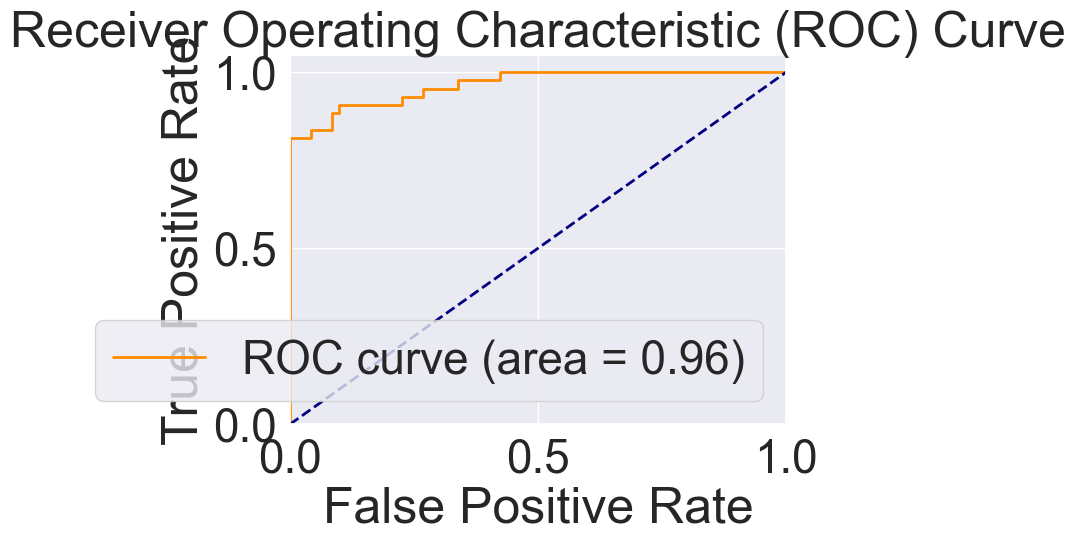

Optimal Threshold: 0.113683455


In [43]:
# Predict probabilities for the positive class
y_probs = best_model.predict(X_test_d)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decide probability threshold based on ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)



In [49]:
# Define the deep neural network model with the best hyperparameters
best_n_layers = best_params_dnn['n_layers']
best_n_neurons = [best_params_dnn[f'n_neurons_{i}'] for i in range(best_n_layers)]
best_activation = best_params_dnn['activation']
best_learning_rate = best_params_dnn['learning_rate']
best_optimizer = best_params_dnn['optimizer']

# Build the neural network model with the best hyperparameters
best_model = Sequential()
for i in range(best_n_layers):
    if i == 0:
        best_model.add(Dense(best_n_neurons[i], activation=best_activation, input_shape=(X_train_d.shape[1],)))
    else:
        best_model.add(Dense(best_n_neurons[i], activation=best_activation))
best_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the best optimizer and learning rate
best_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the training data
best_model.fit(X_train_d, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model on the test data to assess its performance
loss, accuracy = best_model.evaluate(X_test_d, y_test)
y_pred = (best_model.predict(X_test_d) > optimal_threshold).astype("int32")
recall = recall_score(y_test, y_pred)

print("Test Loss:", loss)
#print("Test Accuracy:", accuracy)
print("Test Recall:", recall)

4/4 [==============================] - 0s 1ms/step
Test Loss: 0.27647241950035095
Test Recall: 1.0
